In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib 


In [2]:
best_model=joblib.load('../models/best_model.pkl','rb')

In [4]:
df=pd.read_csv(r'F:\Machine_Learning\Ml_Projects\texas_price_prediction\data\preprocessed_data\Preprocessed_df.csv')

In [5]:
x=df.drop('ANNUAL',axis=1)
y=df['ANNUAL']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
best_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [15]:
y_pred=best_model.predict(X_test)

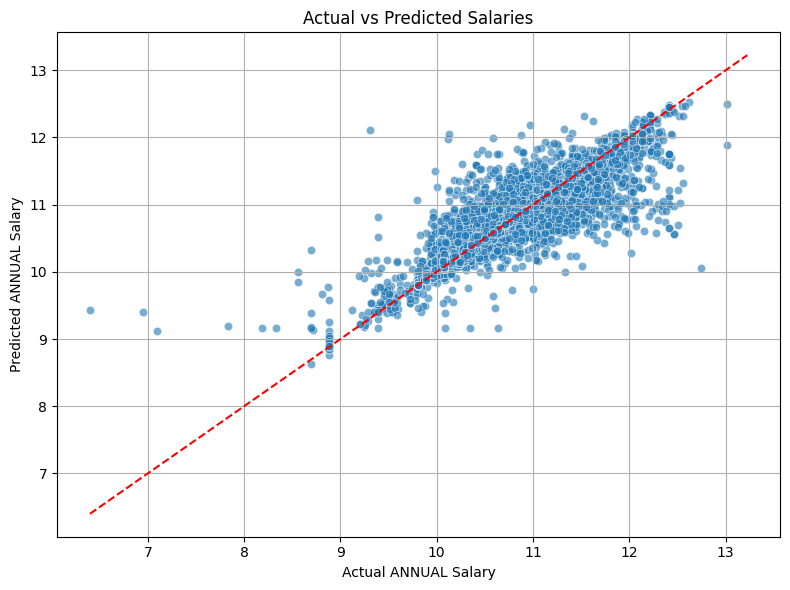

In [ ]:
# Actual vs Predicted Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual ANNUAL Salary')
plt.ylabel('Predicted ANNUAL Salary')
plt.title('Actual vs Predicted Salaries')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.grid()
plt.tight_layout()
plt.show()


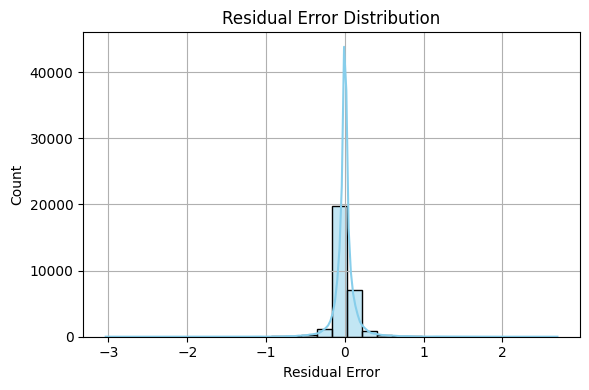

In [28]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title('Residual Error Distribution')
plt.xlabel('Residual Error')
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.5f}')
print(f'MAE: {mae:.5f}')
print(f'RMSE: {rmse:.5f}')
print(f'R2 Score: {r2:.5f}')


MSE: 0.02481
MAE: 0.07832
RMSE: 0.15753
R2 Score: 0.86158
